In [1]:
#https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import matplotlib.pyplot as plt

data = pd.read_csv('sentiment.csv')
# Keeping only the neccessary columns
data = data['text']

In [56]:
n_samples = 13871

In [57]:
len(data)

13871

In [58]:
#perform doc2vec embeddings on comments with gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [59]:
sample_data = data[:n_samples]

In [60]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sample_data)]

In [ ]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('{0}'.format(epoch), end =" ")
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

0 1 2 3 4 5 6 7 8 9 10 11 12 

In [7]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("hello how are you".lower())
v1 = model.infer_vector(test_data)
print("inferred docvector for 'hello how are you': ", v1)

print("most similar docvectors to '1': ",model.dv.most_similar('1'))

print("docvector of '1': ",model.dv['1'])

inferred docvector for 'hello how are you':  [-4.4448312e-02 -3.4516435e-02  8.3655834e-02  8.6150408e-02
 -1.3874003e-01  1.2609083e-04 -4.7308221e-02  6.8486236e-02
 -1.4251466e-01  5.7041332e-02  2.6820606e-02  4.1791643e-03
  9.9954553e-02 -3.6945157e-03  1.6796234e-01  1.4166325e-01
  2.2783916e-01  1.5104025e-02 -1.3532659e-01 -1.9006032e-01]
most similar docvectors to '1':  [('476', 0.8469444513320923), ('823', 0.7529228925704956), ('507', 0.7310933470726013), ('665', 0.7243500351905823), ('227', 0.7201036810874939), ('345', 0.7066760659217834), ('710', 0.7048251032829285), ('294', 0.6997612118721008), ('267', 0.6991769075393677), ('14', 0.6845133304595947)]
docvector of '1':  [-2.5572422  3.199605   2.6705997  3.7570448  4.3465786  2.966976
 -1.5322927 -2.5074337 -1.8984704  2.114341   5.088019  -1.6215256
 -1.956235   2.073024   2.7837076 -5.664419   7.6153784 -3.9291835
 -4.4119005 -7.472574 ]


In [8]:
doc_vectors = {doc:model.infer_vector(word_tokenize(doc.lower())) for doc in sample_data}

In [9]:
list(doc_vectors.values())[0]

array([ 0.13943349,  0.03214369,  0.19405207,  0.13992588, -0.16243348,
        0.05353091, -0.04081282,  0.3856198 , -0.25543326,  0.14029323,
        0.20315057, -0.05356132,  0.2275687 ,  0.04848615,  0.22087511,
        0.0847242 ,  0.4262912 , -0.17222148, -0.37770587, -0.4685434 ],
      dtype=float32)

In [12]:
#perform k-means clustering on embedded documents

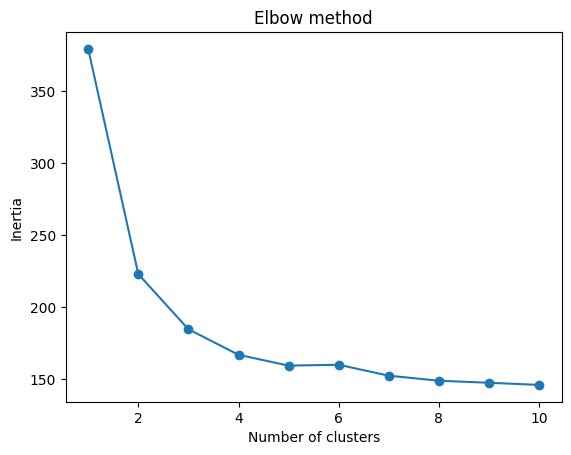

In [10]:
from sklearn.cluster import KMeans

data = list(doc_vectors.values())
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [11]:
num_clusters = 3
cluster_indices = [i for i in range(num_clusters)]

In [12]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

KMeans(n_clusters=3)

In [16]:
#find centroids. compute bigram closest to centroid

In [13]:
centroids  = kmeans.cluster_centers_; centroids

array([[ 7.08021964e-03,  1.41486060e-02,  1.59716350e-01,
         1.22037491e-01, -6.51692259e-02,  6.43983859e-04,
         6.26959353e-02,  2.25012359e-01, -2.20592914e-01,
         3.80528969e-02,  1.78552272e-01, -9.41957187e-02,
         2.25362974e-01,  4.74969909e-03,  1.59645433e-01,
         1.32287724e-01,  3.32384124e-01, -9.29928216e-02,
        -1.84483756e-01, -2.80112895e-01],
       [ 1.92306740e-02,  1.97236245e-02,  3.02798381e-01,
         2.23199978e-01, -1.15460981e-01, -1.71529207e-02,
         1.14155362e-01,  4.25244115e-01, -4.03304498e-01,
         7.46232469e-02,  3.11302839e-01, -1.66140607e-01,
         3.94965384e-01,  1.56057310e-02,  3.01955413e-01,
         2.36945234e-01,  6.01349941e-01, -1.74437438e-01,
        -3.34822150e-01, -5.07933813e-01],
       [ 2.79036103e-02,  1.34045999e-02,  4.37250658e-01,
         3.44902831e-01, -1.59796780e-01, -4.52568100e-02,
         1.76604915e-01,  6.25498515e-01, -5.94997990e-01,
         1.05127907e-01,  4.5

In [14]:
#compute distances between centroids
centroid_dists = sum([[np.linalg.norm(centroids[i]-centroids[j]) for j in range(i+1,num_clusters)] for i in range(num_clusters)],[]); centroid_dists

[0.5895418039252545, 1.1824466664705706, 0.5943983361880427]

In [15]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(list(doc_vectors.values()))
explained_variance = pca.explained_variance_ratio_

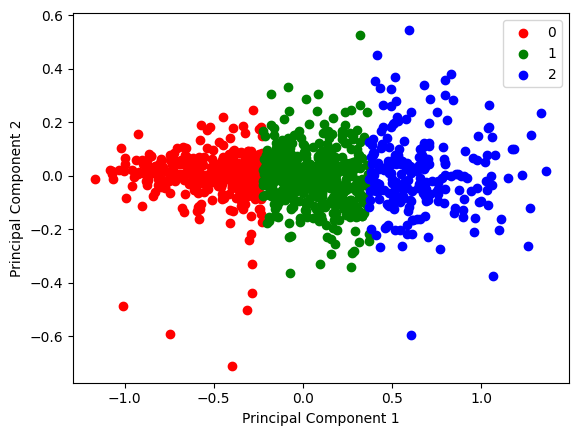

In [16]:
# plot the first two principal components with labels
pca_labeled = list(zip(pca_fit,kmeans.labels_))
colors = ["r", "g", "b", "y"]
for index, color in zip(cluster_indices, colors):
    pca_fit_cluster = [pt[0] for pt in pca_labeled if pt[1] == index]
    pca_fit_i_x = np.array(pca_fit_cluster).transpose()[0]
    pca_fit_i_y = np.array(pca_fit_cluster).transpose()[1]
    plt.scatter(pca_fit_i_x, pca_fit_i_y, color=color, label=index)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [22]:
#a selection of poliical words 
political_keywords = list(pd.read_csv("political_keywords.csv"))

In [23]:
#create unique bigrams from list of political words
bigrams = []
for i in range(len(political_keywords)):
    for j in range(i+1,len(political_keywords)):
        bigrams.append(political_keywords[i] + " " + political_keywords[j])

In [27]:
#get a list of political bigrams directly
political_bigrams = list(pd.read_csv("political_bigrams.csv"))

In [28]:
political_bigrams[:10]

['economic policy',
 'foreign affairs',
 'national security',
 'civil rights',
 'social justice',
 'tax reform',
 'health care',
 'immigration law',
 'gun control',
 'climate change']

In [29]:
bigram_vecs = {bigram:model.infer_vector(word_tokenize(bigram.lower())) for bigram in political_bigrams}

In [30]:
list(bigram_vecs.values())[0]

array([-0.01408094, -0.01911919,  0.0315769 ,  0.02114475, -0.00049467,
        0.0453298 ,  0.00478415, -0.02014244, -0.08791973,  0.0462481 ,
       -0.00321454,  0.00574369,  0.10875714, -0.05157129,  0.08357191,
        0.03897614,  0.10731374, -0.0130823 , -0.08576167, -0.14049351],
      dtype=float32)

In [31]:
#define cosine similarity
from numpy.linalg import norm
def similarity(v,w):
    return np.dot(v,w)/(norm(v)*norm(w))

In [41]:
#find closest bigram to centroid
nearest_bigram_to_centroid = []
for centroid in centroids:
    min_dist = 2
    nearest_bigram = ""
    for bigram, embedding in bigram_vecs.items():
        #dist = similarity(centroid, embedding)
        np.linalg.norm(centroid - embedding)
        if dist < min_dist:
            min_dist = dist
            nearest_bigram = bigram
    nearest_bigram_to_centroid.append((nearest_bigram,min_dist))

In [42]:
nearest_bigram_to_centroid

[('economic policy', 0.8792380665183498),
 ('economic policy', 0.8792380665183498),
 ('economic policy', 0.8792380665183498)]

In [40]:
for comment in sample_data[:10]:
    print(comment)

RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate
RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…
RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.
RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …
RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…
RT @GregAbbott_TX: @TedCruz: "On my first day I will rescind every illegal executive action taken by Barack Obama." #GOPDebate @FoxNews
RT @warriorwoman91: I liked her and was happy when I heard she was going to be the moderator. Not anymore. #GOPDebate @megynkelly  https://…
Going on #MSNBC Live with @ThomasARoberts around 2 PM ET.  #GOPDebate
Deer in the headlights RT @lizzwinstea

In [29]:
#label the data with the appropriate label from k-means clustering
labeled_data = list(zip(sample_data,kmeans.labels_))

In [30]:
#separate documents by label. build vocabulary for each cluster
cluster_vocab = [[] for label in cluster_indices]
cluster_docs = [[] for label in cluster_indices]
for doc, label in labeled_data:
    cluster_vocab[label] += word_tokenize(doc.lower())
    cluster_docs[label].append(doc)

In [123]:
#METHOD 2) use word embeddings to compute distance from word to list of words, take closest words

In [31]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [32]:
nlp("hello").similarity(nlp("hi"))

0.5797264417406982

In [33]:
#define function which measures distance to a set of words using word embeddings and cosine similarity
def dist_to_wordset(keyword,wordset):
    return min([nlp(keyword).similarity(nlp(word)) for word in wordset])

In [34]:
dist_to_wordset(political_keywords[0],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_17452/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


-0.2748392664312949

In [38]:
#compute the political keyword with the closest distance
#this is essentially computing the Hausdorff distance between these two sets
def closest_keyword(keywords,wordset):
    max_dist = -2
    max_keyword = ""
    for keyword in keywords:
        dist = dist_to_wordset(keyword,wordset)
        if dist > max_dist:
            max_dist = dist
            max_keyword = keyword
    return (max_keyword,max_dist)

In [39]:
closest_keyword(political_keywords[:3],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_2309/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


('republic', -0.2577690642582492)

In [35]:
#METHOD 3: Use TF-IDF on each cluster to extract top two words
from sklearn.feature_extraction.text import TfidfVectorizer
def top_words_in_cluster(cluster_index,num_words=10):
    tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word',stop_words='english')
    corpus_tfidf = tfidf_vectorizer.fit_transform(cluster_docs[cluster_index])
    tfidf_df = pd.DataFrame(corpus_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names_out())
    tfidf_scores = tfidf_df.sum(axis=0)
    return tfidf_scores.nlargest(n=num_words)

In [37]:
top_words_in_cluster(0)

http               20.486685
https               8.817792
trump               7.374561
night               6.819720
realdonaldtrump     4.549463
debate              4.495866
like                4.294735
megynkelly          3.936301
tcot                3.930416
gop                 3.620411
dtype: float64